## 1- importer les bibliothéques

In [1]:
import os
from PIL import Image
import numpy as np 
import pandas as pd
from skimage.io import imread
import matplotlib.pyplot as plt
import shutil
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import make_scorer, recall_score, precision_score

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation, BatchNormalization
from keras.backend import dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 2- fixer les path des données augmenter 

In [2]:
sj_fliped='/kaggle/input/sjdata/DATA_(512,512)/augmented_data/sj_aug/sj_fliped'
sj_zoom='/kaggle/input/sjdata/DATA_(512,512)/augmented_data/sj_aug/sj_zoom'
sj_rotation='/kaggle/input/sjdata/DATA_(512,512)/augmented_data/sj_aug/sj_rotation'
sj_translation='/kaggle/input/sjdata/DATA_(512,512)/augmented_data/sj_aug/sj_translation'
sj_distortion='/kaggle/input/sjdata/DATA_(512,512)/augmented_data/sj_aug/sj_distortion'
sj_rot_trans_flip='/kaggle/input/sjdata/DATA_(512,512)/augmented_data/sj_aug/sj_fliped_rotation_translation'
sj_flip_distortion='/kaggle/input/sjdata/DATA_(512,512)/augmented_data/sj_aug/sj_fliped_distortion'
sj_rot_tran='/kaggle/input/sjdata/DATA_(512,512)/augmented_data/sj_aug/sj_rotation_translation'

nsj_fliped='/kaggle/input/sjdata/DATA_(512,512)/augmented_data/nsj_aug/nsj_fliped'
nsj_zoom='/kaggle/input/sjdata/DATA_(512,512)/augmented_data/nsj_aug/nsj_zoom'
nsj_rotation='/kaggle/input/sjdata/DATA_(512,512)/augmented_data/nsj_aug/nsj_rotation'
nsj_translation='/kaggle/input/sjdata/DATA_(512,512)/augmented_data/nsj_aug/nsj_translation'
nsj_distortion='/kaggle/input/sjdata/DATA_(512,512)/augmented_data/nsj_aug/nsj_distortion'
nsj_rot_trans_flip='/kaggle/input/sjdata/DATA_(512,512)/augmented_data/nsj_aug/nsj_fliped_rotation_translation'
nsj_flip_distortion='/kaggle/input/sjdata/DATA_(512,512)/augmented_data/nsj_aug/nsj_fliped_distortion'
nsj_rot_tran='/kaggle/input/sjdata/DATA_(512,512)/augmented_data/nsj_aug/nsj_rotation_translation'

In [3]:
sj_path='/kaggle/input/sjdata/DATA_(512,512)/sj_data'
nsj_path='/kaggle/input/sjdata/DATA_(512,512)/nsj_data'

## Mise en Forme des images

In [4]:

def mise_tenseur (path, nl, nc,pl):
    images_liste = os.listdir(path)
    images_liste.sort()
    Nb_images = len(images_liste)
    tenseur = np.empty((Nb_images, nl, nc, pl), dtype=np.uint8)
    k = 0
    for im in images_liste:
       
        img = imread(path+'/'+im)
        tenseur[k, :, :, 0] = img
        k +=1
    return(tenseur)

In [5]:
sj_original=mise_tenseur(sj_path,512,512,1)
nsj_original=mise_tenseur(nsj_path,512,512,1)

# Part2_with_aug_data

In [6]:
flipped_data= mise_tenseur(sj_fliped, 512,512,1)
zoom_data=mise_tenseur(sj_zoom,512,512,1)
rotate_data=mise_tenseur(sj_rotation,512,512,1)
translate_data=mise_tenseur(sj_translation,512,512,1)
distortion_data=mise_tenseur(sj_distortion,512,512,1)
flip_dist_data=mise_tenseur(sj_flip_distortion,512,512,1)
rot_trans_flip_data=mise_tenseur(sj_rot_trans_flip,512,512,1)


In [10]:
print(len(flipped_data),len(zoom_data),len(rotate_data),len(translate_data),len(distortion_data),len(flip_dist_data),len(rot_trans_flip_data))

115 230 230 230 230 230 460


In [7]:
sj_data = []
sj_data.extend(rotate_data)
sj_data.extend(flipped_data)
sj_data.extend(zoom_data)
sj_data.extend(translate_data)
sj_data.extend(distortion_data)
sj_data.extend(rot_trans_flip_data)
sj_data.extend(flip_dist_data)
sj_data.extend(sj_original)

In [8]:
len(sj_data)

1840

In [9]:
flipped_data_nsj= mise_tenseur(nsj_fliped,512,512,1)
zoom_data_nsj=mise_tenseur(nsj_zoom,512,512,1)
rotate_data_nsj=mise_tenseur(nsj_rotation,512,512,1)
translate_data_nsj=mise_tenseur(nsj_translation,512,512,1)
distortion_data_nsj=mise_tenseur(nsj_distortion,512,512,1)
flip_dist_data_nsj=mise_tenseur(nsj_flip_distortion,512,512,1)
rot_trans_flip_data_nsj=mise_tenseur(nsj_rot_trans_flip,512,512,1)


In [10]:
print(len(flipped_data_nsj),len(zoom_data_nsj),len(rotate_data_nsj),len(translate_data_nsj),len(distortion_data_nsj),len(flip_dist_data_nsj),len(rot_trans_flip_data_nsj))

110 220 220 220 220 220 440


In [11]:
nsj_data = []
nsj_data.extend(rotate_data_nsj)
nsj_data.extend(flipped_data_nsj)
nsj_data.extend(rot_trans_flip_data_nsj)
nsj_data.extend(zoom_data_nsj)
nsj_data.extend(distortion_data_nsj)
nsj_data.extend(translate_data_nsj)
nsj_data.extend(flip_dist_data_nsj)
nsj_data.extend(nsj_original)

In [12]:
len(nsj_data)

1760

In [13]:
labels1 = [0] * len(nsj_data)  # labels pour la première classe (0)
labels2 = [1] * len(sj_data)  # labels pour la deuxième classe (1)

# Fusionner les données et les labels en un seul tableau multidimensionnel
data = np.concatenate([nsj_data, sj_data])
print(len(data))
labels = np.concatenate([labels1, labels2])
len(labels)


3600


3600

In [14]:
x_train, x_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [15]:
# normaliser les données 
x_val = x_val.reshape(x_val.shape[0], 512,512, 1).astype('float32') / 255
x_train = x_train.reshape(x_train.shape[0], 512,512, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 512,512, 1).astype('float32') / 255

# cnn

In [16]:
model = Sequential()
model.add(Conv2D(32,(11,11),activation='relu', input_shape = (512,512,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, kernel_size = (7,7),activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, kernel_size = (7,7),activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, kernel_size = (7,7),activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, kernel_size = (7,7),activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 502, 502, 32)      3904      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 251, 251, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 245, 245, 32)      50208     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 122, 122, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 116, 116, 32)      50208     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 58, 58, 32)       0

In [17]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

In [18]:
H2 = model.fit(x_train, y_train, validation_data= (x_test, y_test), epochs=30, batch_size=32)

Epoch 1/30
68/68 [==============================] - 21s 192ms/step - loss: 0.6796 - accuracy: 0.5505 - val_loss: 0.6550 - val_accuracy: 0.5861
Epoch 2/30
68/68 [==============================] - 9s 138ms/step - loss: 0.6021 - accuracy: 0.6583 - val_loss: 0.5991 - val_accuracy: 0.6583
Epoch 3/30
68/68 [==============================] - 9s 136ms/step - loss: 0.5372 - accuracy: 0.7116 - val_loss: 0.4971 - val_accuracy: 0.7486
Epoch 4/30
68/68 [==============================] - 9s 137ms/step - loss: 0.4673 - accuracy: 0.7639 - val_loss: 0.4788 - val_accuracy: 0.7528
Epoch 5/30
68/68 [==============================] - 9s 139ms/step - loss: 0.4145 - accuracy: 0.8046 - val_loss: 0.4453 - val_accuracy: 0.7750
Epoch 6/30
68/68 [==============================] - 9s 137ms/step - loss: 0.3303 - accuracy: 0.8519 - val_loss: 0.3505 - val_accuracy: 0.8333
Epoch 7/30
68/68 [==============================] - 10s 142ms/step - loss: 0.2637 - accuracy: 0.8829 - val_loss: 0.2522 - val_accuracy: 0.8903
Epoc

# Evaluation

## Matrice de confusion de test


23/23 [==============================] - 1s 48ms/step


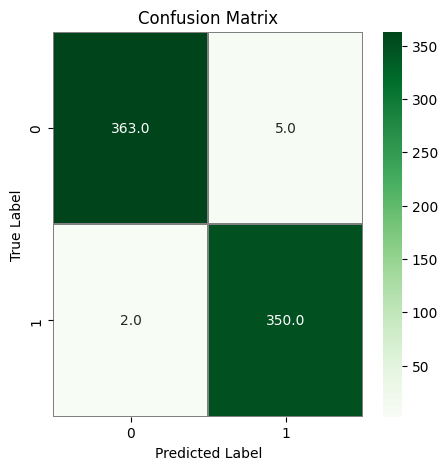

[[363   5]
 [  2 350]]


In [59]:
import seaborn as sns
# Générer des prédictions sur l'ensemble de test
y_pred = model.predict(x_test)
y_pred_classes = np.where(y_pred>0.5,1.,0)

# Calculer la matrice de confusion
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_classes)
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
print(cm)

In [22]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       368
           1       0.99      0.99      0.99       352

    accuracy                           0.99       720
   macro avg       0.99      0.99      0.99       720
weighted avg       0.99      0.99      0.99       720



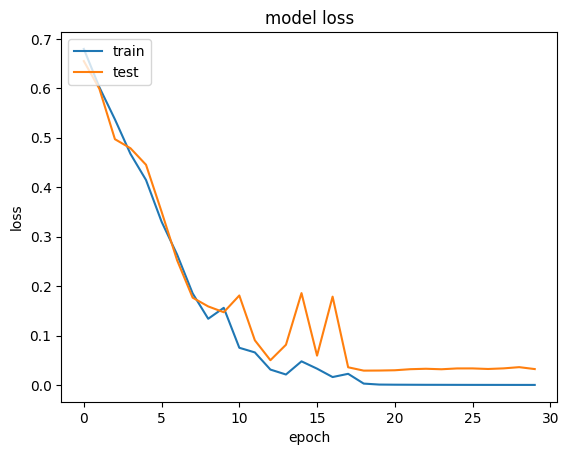

In [23]:
#loss
plt.plot(H2.history['loss'])
plt.plot(H2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Cartes d'activation

1/1 [==============================] - 0s 44ms/step


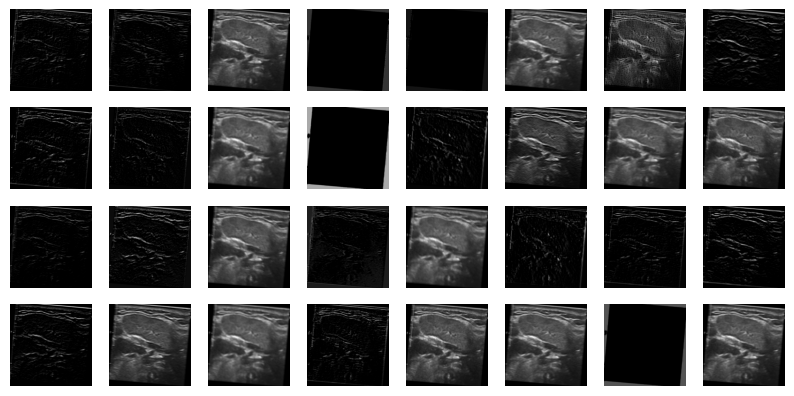

In [27]:
from tensorflow.keras.models import Model

activation_model = Model(inputs=model.input, outputs=model.layers[0].output)
activations = activation_model.predict(x_test[1].reshape(1, 512,512, 1))

plt.figure(figsize=(10, 10))
for i in range(activations.shape[3]):
    plt.subplot(8, 8, i+1)
    plt.imshow(activations[0, :, :, i], cmap='gray')
    plt.axis('off')
plt.show()